In [2]:
from fem.oned_deterministic import solve_system, L2_error
import matplotlib.pyplot as plt
from math import sin, cos, pi
import numpy as np
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

In [4]:
def do_fem(f, a, b, c):
    errors = []
    XS = np.linspace(0, 1, 512)
    US = [u(x) for x in XS]

    for N in [4, 8, 16, 32, 64, 128, 256, 512]:
        # Solve the system 
        xs, U = solve_system(f, N, a, b, c)
    
        # Calculate the error
        errors.append((N, L2_error(u, U, N)))
    
        # Do a plot
        if N == 32:
            fig, ax = plt.subplots(1)
            ax.plot(XS, US, c='black', label=r'$u(x) = \sin(\pi x)$')
            ax.scatter(xs, U, facecolor='red', marker='o', s=50, linewidth=0, label=r'$u^h(x)$', alpha=1)
            ax.set_xlim(0, 1)
            ax.set_xlabel(r"$x$", fontsize=18)
            ax.set_ylim(0, 1.2)
            ax.set_ylabel(r'$u(x)$', fontsize=18)
            ax.legend(fontsize=18, loc=0)
        
    return errors, fig

## Define the problem

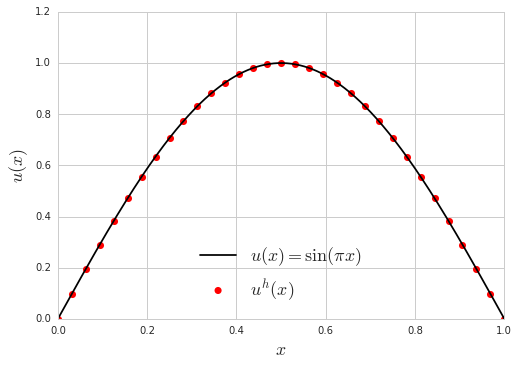

In [5]:
a, b, c = 1, 0, 0

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x)

case1, p = do_fem(f, a, b, c)
p.savefig('oned-deterministic-plot.pdf')

## Case 2: a = 1, b = 0, c = 1

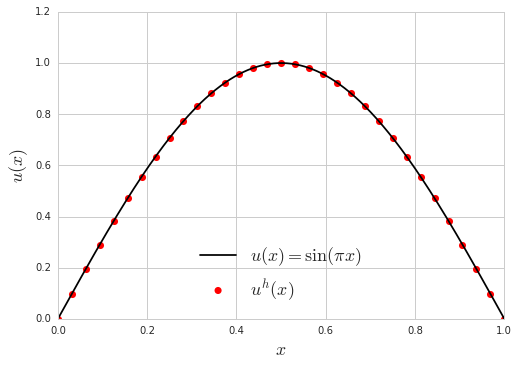

In [6]:
a, b, c = 1, 0, 1

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x) + sin(pi*x)

case2, p = do_fem(f, a, b, c)

## Case 3: a = 1, b = 0, c = 10

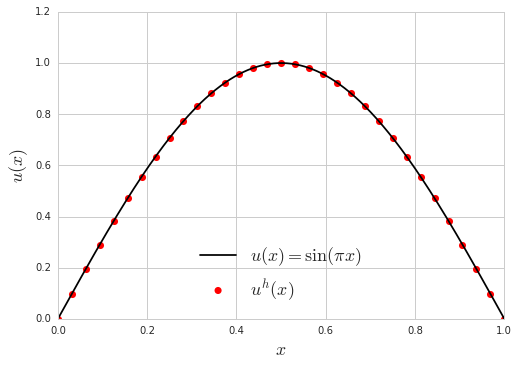

In [7]:
a, b, c = 1, 0, 10

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x) + 10*sin(pi*x)

case3, p = do_fem(f, a, b, c)

## Case 4: a = 1, b = 1, c = 0

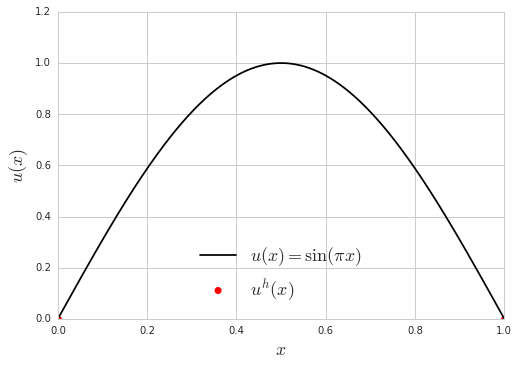

In [8]:
a, b, c = 1, 1, 0

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x) + pi*cos(pi*x)

errors, p = do_fem(f, a, b, c)

### Plot of convergence

In [9]:
# Reshape the data
NS = [x[0] for x in case1]
case1 = [x[1] for x in case1]
case2 = [x[1] for x in case2]
case3 = [x[1] for x in case3]

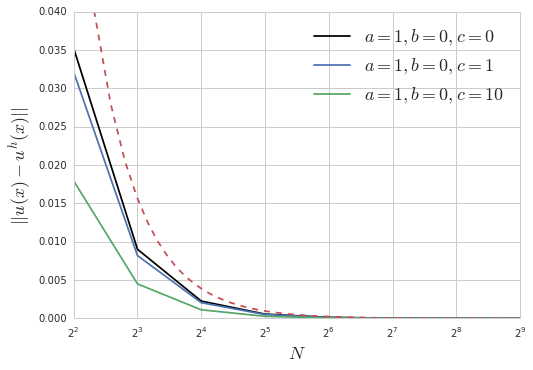

In [16]:
ns = np.linspace(4, 512, 512)
apriori = [1/(n**2) for n in ns]

fig, ax = plt.subplots(1)
ax.set_xscale('log', basex=2)
ax.set_xlabel(r'$N$', fontsize=18)
ax.set_ylabel(r'$||u(x) - u^h(x)||$', fontsize=18)
ax.set_ylim([0,0.04])
ax.plot(NS, case1, c='black', label=r'$a=1, b=0, c=0$')
ax.plot(NS, case2, label=r'$a=1, b=0, c=1$')
ax.plot(NS, case3, label=r'$a=1, b=0, c=10$')
ax.plot(ns, apriori, '--')
ax.legend(fontsize=18, loc=0)


In [58]:
fig.savefig('one-d-deterministic-error.pdf')